<a href="https://colab.research.google.com/github/mamuncseru/deep_understanding_deep_learning/blob/main/DUDL_GPU_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

In [3]:
# use GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Build a simple model

In [4]:
net = nn.Sequential(
    nn.Linear(20, 100),
    nn.ReLU(),
    nn.Linear(100, 500),
    nn.ReLU(),
    nn.Linear(500, 30),
    nn.ReLU(),
    nn.Linear(30, 2)
)

## Make som edata

In [5]:
# Just some random fluff
data = torch.randn((1000, 20)) # samples X features
labels = torch.randint(low=0, high=2, size=(1, 1000))


## Send the model and the data to the GPU

In [6]:
# mode
net.to(device)

# data
data = data.to(device)
labels = labels.to(device)

In [7]:
data

tensor([[-1.4438,  0.7234, -0.5966,  ...,  2.4627, -0.0410, -0.4193],
        [ 0.7242, -0.5794,  0.2933,  ..., -0.8391,  0.5883,  1.4741],
        [ 0.2321, -1.2270, -0.0497,  ...,  1.4793,  0.5066, -0.3198],
        ...,
        [ 0.1533, -0.5146,  0.2705,  ..., -0.1638, -0.0141, -1.1907],
        [ 1.1571,  1.1448,  0.2002,  ...,  0.9418,  2.4171, -1.4743],
        [-0.3024, -0.0164,  1.6695,  ...,  0.5914,  0.4855, -0.1735]],
       device='cuda:0')

In [8]:
# you can also create data directly on the GPU
dataG = torch.randn((1000, 20), device=device)
dataC = torch.randn((1000, 20), device='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)

cuda:0
cuda:0
cpu


# Getting results from the model

In [9]:
output = net(data)

In [10]:
output.device

device(type='cuda', index=0)

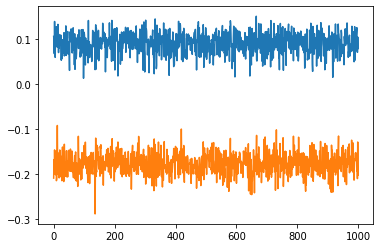

In [12]:
# try to plot the data
# plt.plot(output.detach());

plt.plot(output.detach().cpu())

# Experiment: Computation time

In [13]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cuda:0'
net.to(device)
data = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
GPUtime = 1000 * (time.process_time() - starttime)

In [14]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cpu'
net.to(device)
data = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
CPUtime = 1000 * (time.process_time() - starttime)

In [15]:
# time in ms
[CPUtime, GPUtime]

[14.06731299999997, 3.6343609999995863]

In [16]:
# but maybe "sending" it to the CPU takes too much overhead?

In [17]:
# recreate network and data
net = nn.Sequential(nn.Linear(20,100), nn.ReLU(), nn.Linear(100, 500), nn.ReLU(),nn.Linear(500, 30),nn.ReLU(),nn.Linear(30, 2))
data = torch.randn((1000, 20))

# rerun the experiment
starttime = time.process_time()
output = net(data).detach()
CPUtime2 = 1000*(time.process_time() - starttime)

# report the results
[CPUtime2, CPUtime, GPUtime]

[4.706205999999824, 14.06731299999997, 3.6343609999995863]